In [3]:
# This is an example of building an image classifier in pytorch
# We will be using the CIFAR10 dataset, which has 10 labels [airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, 'truck']
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torch import nn 
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms

In [4]:
# define transformations to be carried out on the input data
transformations = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [5]:
# define batch size
batch_size = 4

# number of workers
num_workers = 2

In [6]:
# load training data
trainset = torchvision.datasets.CIFAR10(root="../data/", train=True,transform=transformations,download=True)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

testset = torchvision.datasets.CIFAR10(root="../data/", train=False,transform=transformations,download=True)
testLoader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def get_label(id: int):
    return classes[id]

In [8]:
data = next(iter(trainLoader))
data

[tensor([[[[ 0.4353,  0.4431,  0.5294,  ...,  0.6157,  0.6157,  0.6235],
           [ 0.4667,  0.4824,  0.5373,  ...,  0.6157,  0.6235,  0.6235],
           [ 0.5216,  0.5529,  0.6000,  ...,  0.6941,  0.6314,  0.6078],
           ...,
           [-0.5216, -0.5686, -0.6235,  ..., -0.2157, -0.2941, -0.3412],
           [-0.1765, -0.2941, -0.3412,  ..., -0.5608, -0.5765, -0.5765],
           [-0.5373, -0.5922, -0.5686,  ..., -0.3176, -0.2784, -0.2784]],
 
          [[ 0.5843,  0.5294,  0.5686,  ...,  0.6471,  0.6706,  0.6627],
           [ 0.5765,  0.5529,  0.5843,  ...,  0.6549,  0.6706,  0.6627],
           [ 0.6000,  0.6157,  0.6471,  ...,  0.7333,  0.6863,  0.6549],
           ...,
           [-0.5686, -0.6157, -0.6706,  ..., -0.2627, -0.3333, -0.3725],
           [-0.2078, -0.3255, -0.3882,  ..., -0.6000, -0.6078, -0.5843],
           [-0.5529, -0.6078, -0.5843,  ..., -0.3255, -0.2784, -0.2706]],
 
          [[ 0.6941,  0.6392,  0.6706,  ...,  0.7176,  0.7412,  0.7412],
           [ 

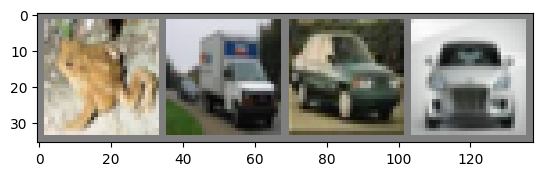

 frog
 truck
 car
 car


In [9]:
# write function to show images
def imshow(image):
    image = image/2 + 0.5
    nimage =  image.numpy()
    plt.imshow(np.transpose(nimage, (1, 2, 0)))
    plt.show()
    
    
dataiter = iter(trainLoader)
image, label = dataiter.next()


imshow(torchvision.utils.make_grid(image))
for j in range(batch_size):
    print(f" {get_label(label[j])}")
    

In [11]:
image.shape

torch.Size([4, 3, 32, 32])

In [13]:
# Define the neural network

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        # 3 input channels, 6 output channels, 5 * 5 convolution kernels
        self.conv_1 = nn.Conv2d(3, 6, 5)
        # max pooling over a 2 * 2 window
        self.pool = nn.MaxPool2d(2, 2)
        self.conv_2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
    def forward(self,X):
        x = self.pool(F.relu(self.conv_1(X)))
        x = self.pool(F.relu(self.conv_2(x)))
        x = x.view(-1, 16 * 5 *5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
        
net = Net()
print(net)

Net(
  (conv_1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
for epoch in range(2):
    running_loss =  0.0
    
    for i, data in enumerate(trainLoader, 0):
        input, labels = data
        optimizer.zero_grad()
        output = net(input)
        loss  = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i%2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
            
print("Finished training")

[1,  2000] loss: 2.242
[1,  4000] loss: 1.930
[1,  6000] loss: 1.742
[1,  8000] loss: 1.600
[1, 10000] loss: 1.532
[1, 12000] loss: 1.504
[2,  2000] loss: 1.433
[2,  4000] loss: 1.391
[2,  6000] loss: 1.373
[2,  8000] loss: 1.351
[2, 10000] loss: 1.320
[2, 12000] loss: 1.280
Finished training


In [18]:
# save our neural network
PATH = "./cipar_net.pth"
torch.save(net.state_dict(), PATH)

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

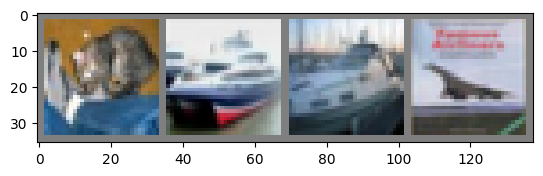

GroundTruth:  cat ship ship plane


In [19]:
dataiter = iter(testLoader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%s' % classes[labels[j]] for j in range(4)))

In [20]:
output = net(images)
_, predicted = torch.max(output, 1)
print('GroundTruth: ', ' '.join('%s' % classes[predicted[j]] for j in range(4)))

GroundTruth:  cat ship car ship


In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %
